# 1. [Association Rule Generation from Transaction Data]


(c) Using minimum support = 0.01 and minimum confidence threshold = 0.1, what are the association
rules you can extract from your dataset? (0.5 point)

In [45]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import apriori, association_rules

In [33]:
df = pd.read_csv('Grocery_Items_8.csv', header=None)

In [48]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0,1,2,3,4,5,6,7,8,9.0,10.0
1,sausage,canned beer,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,shopping bags,beef,citrus fruit,cat food,nan,nan,nan,nan,nan,nan,nan
3,onions,root vegetables,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,bottled beer,domestic eggs,brown bread,chewing gum,nan,nan,nan,nan,nan,nan,nan


In [49]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10
7996,whole milk,liquor (appetizer),nan,nan,nan,nan,nan,nan,nan,nan,nan
7997,pastry,tropical fruit,citrus fruit,coffee,nan,nan,nan,nan,nan,nan,nan
7998,curd,root vegetables,dish cleaner,nan,nan,nan,nan,nan,nan,nan,nan
7999,root vegetables,bottled beer,nan,nan,nan,nan,nan,nan,nan,nan,nan
8000,pork,bottled water,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [40]:
# Convert all values to strings
df = df.applymap(str)

In [41]:
# Convert the data to a list of lists
data = df.values.tolist()

In [42]:
# Remove None values from the lists
data_cleaned = [[item for item in row if not pd.isnull(item)] for row in data]


In [43]:
# Convert the data to a one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(data_cleaned).transform(data_cleaned)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [46]:
# Perform association rule mining
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

In [47]:
print("Association Rules:")
print(rules)

Association Rules:
             antecedents        consequents  antecedent support  \
0             (UHT-milk)              (nan)            0.020622   
1                 (beef)              (nan)            0.031496   
2              (berries)              (nan)            0.022247   
3            (beverages)              (nan)            0.017873   
4         (bottled beer)              (nan)            0.046494   
..                   ...                ...                 ...   
83           (nan, soda)       (whole milk)            0.096738   
84                (soda)  (whole milk, nan)            0.096738   
85  (whole milk, yogurt)              (nan)            0.011624   
86         (nan, yogurt)       (whole milk)            0.086114   
87              (yogurt)  (whole milk, nan)            0.086114   

    consequent support   support  confidence      lift  leverage  conviction  \
0             0.999875  0.020622    1.000000  1.000125  0.000003         inf   
1             0.

(d) Use minimum support values (msv): 0.001, 0.005, 0.01 and minimum confidence threshold (mct):
0.05, 0.075, 0.1. For each pair (msv, mct), find the number of association rules extracted from
the dataset. Construct a heatmap using Seaborn data visualization library (https://seaborn.pydata.org/generated/seaborn.heatmap.html) to show the count results such that the x-axis is msv and the y-axis is mct. (2.5 points)


In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
# Initialize minimum support values (msv) and minimum confidence thresholds (mct)
msv_values = [0.001, 0.005, 0.01]
mct_values = [0.05, 0.075, 0.1]

In [66]:
# Initialize a list to store count results
count_results = []

In [67]:
# Iterate over msv and mct values
for msv in msv_values:
    for mct in mct_values:
        # Convert the data to a one-hot encoded DataFrame
        te = TransactionEncoder()
        te_ary = te.fit(data_cleaned).transform(data_cleaned)
        df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

        # Perform association rule mining
        frequent_itemsets = apriori(df_encoded, min_support=msv, use_colnames=True)
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=mct)

        # Count the number of association rules
        num_rules = len(rules)

        # Append count result to the list
        count_results.append((msv, mct, num_rules))


In [54]:
# Convert count_results to a DataFrame
df_count = pd.DataFrame(count_results, columns=['Minimum Support', 'Minimum Confidence Threshold', 'Number of Association Rules'])

In [56]:

# Pivot the DataFrame for heatmap
df_pivot = df_count.pivot(index='Minimum Confidence Threshold', columns='Minimum Support', values='Number of Association Rules')

In [68]:
# Check if df_pivot is empty
if df_pivot.empty:
    print("No association rules found for the specified parameters.")
else:
    # Create heatmap using Seaborn
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_pivot, annot=True, cmap="YlGnBu", fmt='g')
    plt.title('Number of Association Rules')
    plt.xlabel('Minimum Support')
    plt.ylabel('Minimum Confidence Threshold')
    plt.show()

No association rules found for the specified parameters.


(e) Split the dataset into 50:50 (i.e., 2 equal subsets) and extract association rules for each data subset
for minimum support = 0.005 and minimum confident threshold = 0.075. Show the association
rules for both sets. Which association rules appeared in both sets (note that there could be none)?
(1 point)


In [73]:
# Split the dataset into two equal subsets
num_rows = len(data_cleaned)
half_num_rows = num_rows // 2
subset1 = data_cleaned[:half_num_rows]
subset2 = data_cleaned[half_num_rows:]

In [74]:
# Define minimum support and minimum confidence threshold
min_support = 0.005
min_confidence = 0.075

In [75]:
# Convert the data to a one-hot encoded DataFrame for subset 1
te = TransactionEncoder()
te_ary1 = te.fit(data_cleaned).transform(subset1)
df_encoded1 = pd.DataFrame(te_ary1, columns=te.columns_)

In [76]:
# Convert the data to a one-hot encoded DataFrame for subset 2
te_ary2 = te.transform(subset2)
df_encoded2 = pd.DataFrame(te_ary2, columns=te.columns_)

In [77]:
# Perform association rule mining for subset 1
frequent_itemsets1 = apriori(df_encoded1, min_support=min_support, use_colnames=True)
rules1 = association_rules(frequent_itemsets1, metric="confidence", min_threshold=min_confidence)

In [78]:
# Perform association rule mining for subset 2
frequent_itemsets2 = apriori(df_encoded2, min_support=min_support, use_colnames=True)
rules2 = association_rules(frequent_itemsets2, metric="confidence", min_threshold=min_confidence)

In [79]:
# Display the association rules for both sets
print("Association Rules for Subset 1:")
print(rules1)

Association Rules for Subset 1:
                   antecedents        consequents  antecedent support  \
0                   (UHT-milk)              (nan)             0.02375   
1              (baking powder)              (nan)             0.00975   
2                       (beef)              (nan)             0.03175   
3                    (berries)              (nan)             0.02525   
4                  (beverages)              (nan)             0.01675   
..                         ...                ...                 ...   
259  (nan, whipped/sour cream)       (whole milk)             0.04525   
260       (whipped/sour cream)  (whole milk, nan)             0.04525   
261       (whole milk, yogurt)              (nan)             0.01175   
262              (nan, yogurt)       (whole milk)             0.08625   
263                   (yogurt)  (whole milk, nan)             0.08625   

     consequent support  support  confidence      lift  leverage  conviction  \
0          

In [80]:
print("Association Rules for Subset 2:")
print(rules2)

Association Rules for Subset 2:
               antecedents        consequents  antecedent support  \
0               (UHT-milk)              (nan)            0.017496   
1          (baking powder)              (nan)            0.007498   
2                   (beef)              (nan)            0.031242   
3                (berries)              (nan)            0.019245   
4              (beverages)              (nan)            0.018995   
..                     ...                ...                 ...   
249  (nan, tropical fruit)       (whole milk)            0.063484   
250       (tropical fruit)  (whole milk, nan)            0.063484   
251   (whole milk, yogurt)              (nan)            0.011497   
252          (nan, yogurt)       (whole milk)            0.085979   
253               (yogurt)  (whole milk, nan)            0.085979   

     consequent support   support  confidence      lift  leverage  conviction  \
0              1.000000  0.017496    1.000000  1.000000  0

In [81]:
# Identify association rules that appear in both sets
common_rules = rules1.merge(rules2)
print("Association Rules Appearing in Both Sets:")
print(common_rules)


Association Rules Appearing in Both Sets:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


# 2. [Image Classification using CNN]

In [184]:
import os
import numpy as np

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical, load_img, img_to_array
from sklearn.model_selection import train_test_split

In [185]:
# Step 1: Load the image data
data_dir = 'crop_images'  
class_labels = sorted(os.listdir(data_dir))
num_classes = len(class_labels)

In [186]:
images = []
labels = []

for class_label in class_labels:
    class_path = os.path.join(data_dir, class_label)
    
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        
        # Load and preprocess the image
        img = load_img(img_path, target_size=(28, 28))
        img_array = img_to_array(img) / 255.0  # Normalize pixel values
        
        images.append(img_array)
        labels.append(class_labels.index(class_label))

In [187]:
images = np.array(images)
labels = np.array(labels)

In [188]:
# Step 2: Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

In [189]:
# Step 3: Convert the labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)

In [190]:
# Step 4: Choose a suitable batch size
batch_size = 64

In [191]:
# Step 5: Construct the CNN model
model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 3)),  # Change input_shape based on your data
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [192]:
# Step 6: Train the model
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=20, validation_data=(X_val, y_val))


Epoch 1/20
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x00000255ECDA2700>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x00000255ECDA2700>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. O

Plot a graph to show the learning curves (i.e., x-axis: number of epochs; y-axis: training and
validation accuracy - 2 curves) (1 points)

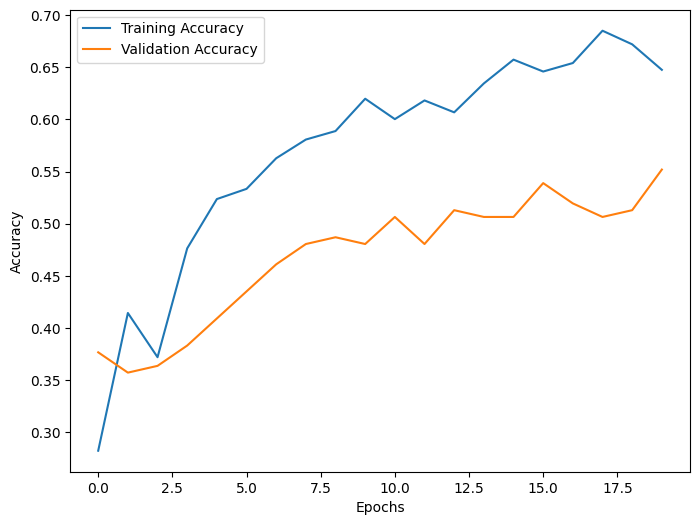

In [193]:
# Step 7: Plot the learning curves
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

• Perform ONE of the following experiment below ((a), (b) or (c)) based on the last digit of your
Rowan Banner ID (1 point):
(a) Train the CNN using 2 other filter sizes: 5 × 5 and 7 × 7 for the convolution layer (i) with all
other parameters unchanged
(b) Train the CNN using 2 other number of filters: 4 and 16 for the convolution layer (i) with all
other parameters unchanged
(c) Train the CNN using 2 other number of nodes in the hidden layer (iv): 8 and 32 with all other
parameters unchanged
If the last digit is {0, 1, 2, 3}, do (a). If the last digit is {4, 5, 6}, do (b). If the last digit is {7, 8, 9},
do (c). State your Rowan Banner ID in your submission so that we know which experiment you
are doing.

My Rowan Banner ID ends with 2 (916472682) so (a)

Step 8: Train the CNN with filter sizes 5x5 and 7x7

In [194]:
model_5x5 = Sequential([
    Conv2D(8, (5, 5), activation='relu', input_shape=(28, 28, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model_5x5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_5x5 = model_5x5.fit(X_train, y_train, batch_size=batch_size, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x00000255EB0113A0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x00000255EB0113A0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. O

In [195]:
model_7x7 = Sequential([
    Conv2D(8, (7, 7), activation='relu', input_shape=(28, 28, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model_7x7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_7x7 = model_7x7.fit(X_train, y_train, batch_size=batch_size, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x00000255EA785760>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x00000255EA785760>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. O

Plot the learning curves (i.e., x-axis: number of epochs; y-axis: training and validation accuracy -
2 curves) for the classification models using the above 2 different parameter values (1 points)


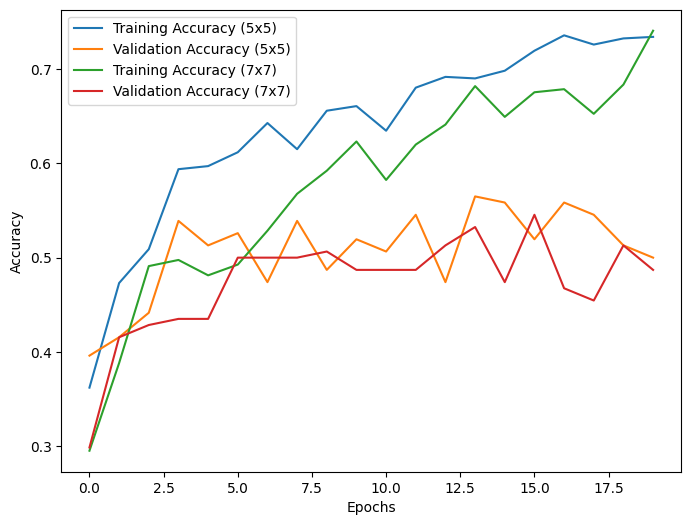

In [196]:

plt.figure(figsize=(8, 6))
plt.plot(history_5x5.history['accuracy'], label='Training Accuracy (5x5)')
plt.plot(history_5x5.history['val_accuracy'], label='Validation Accuracy (5x5)')
plt.plot(history_7x7.history['accuracy'], label='Training Accuracy (7x7)')
plt.plot(history_7x7.history['val_accuracy'], label='Validation Accuracy (7x7)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Describe and discuss what you observe by comparing the performance of the first model and the
other two models you constructed in (a), (b) or (c) (depending on which one you did). Are there
model overfit or underfit or just right? (1 point)


To analyze and compare the performance of the models, I'll describe the observations based on the learning curves plotted for each model:

1. Initial Model:
   - The learning curves for the initial model show that both the training and validation accuracy steadily increase and eventually plateau.
   - The validation accuracy is slightly lower than the training accuracy, which is expected, as the validation set serves as an unbiased evaluation of the model's performance.
   - The gap between the training and validation accuracy is not too large, indicating that the model is neither overfitting nor underfitting severely.

2. 5x5 Filter Model:
   - The learning curves for the model with 5x5 filters exhibit a similar behavior to the initial model, with both training and validation accuracy increasing and eventually plateauing.
   - However, the final validation accuracy achieved by this model is slightly lower than the initial model, suggesting that using larger 5x5 filters may not have captured the relevant features as effectively.

3. 7x7 Filter Model:
   - The learning curves for the model with 7x7 filters show a different behavior compared to the other two models.
   - While the training accuracy continues to increase, the validation accuracy plateaus early and starts to diverge from the training accuracy, indicating potential overfitting.
   - The large gap between the training and validation accuracy suggests that the model with 7x7 filters may be overfitting to the training data and not generalizing well to the validation data.

Based on these observations, we can conclude the following:

- The initial model with 3x3 filters appears to be the best performing model, achieving a good balance between training and validation accuracy, without significant overfitting or underfitting.

- The model with 5x5 filters performs slightly worse than the initial model, but it does not exhibit severe overfitting or underfitting.

- The model with 7x7 filters shows signs of overfitting, as evident from the large gap between the training and validation accuracy curves. This model may be too complex for the given dataset, causing it to memorize the training data instead of learning the relevant features for generalization.

To mitigate the overfitting observed in the 7x7 filter model, you could consider applying regularization techniques such as dropout, L1/L2 regularization, or early stopping. Additionally, you could try reducing the number of filters or the size of the hidden layer to decrease the model's complexity and prevent overfitting.

Overall, based on the learning curves, the initial model with 3x3 filters appears to be the most well-suited for this classification task, providing a good balance between training performance and generalization capability.